## General Machine Learning Process:CRISP DM

<img align="left" src="https://user-images.githubusercontent.com/52098725/69940953-d71a7f80-1526-11ea-9c9d-3af2880a4f36.png" alt="CRISP-DM1">

<img align="left" src="https://user-images.githubusercontent.com/52098725/69941113-0204d380-1527-11ea-8eb6-8809793f516c.png" alt="CRISP-DM2">

## Predictive Analytics Process

<img align="left" src="https://user-images.githubusercontent.com/52098725/69938203-04affa80-1520-11ea-9646-0e3ba6690f9e.png" alt="Analytics Process">

## Step 1: Business Understanding

### 사업 목적
- 새로운 개인연금상품 (PEP: Personal Equity 을 개발하여 기존 고객들을 대상으로 가능한 많은 계좌를 유치


### 분석 목표
- PEP 가입 예측모형 개발
- 고객 프로파일 개발
- 다이렉트 메일 광고 효율성 제고
- 타겟 메일링에 의한 응답률 제고

## Step2: Data Understanding

### 데이터 획득 절차
1) 기존고객 DB 로부터 시험메일 발송을 위한 표본고객목록을 추출<br>
2) 새로운 금융상품 (PEP)의 제안 메일을 발송<br>
3) 고객의 반응을 기록<br>


### 분석 데이터
- 학습용 데이터 600 건 M3T1_data_pepTestCustomers.csv
- 신규고객 데이터 200 건 M3T1_data_pepNewCustomers.csv

#### Frequently used libraries in Module 3 & 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Collect Initial Data

In [2]:
import os
os.getcwd()

'D:\\ML_CHRD'

In [3]:
# for modeling
df = pd.read_csv("./강의자료/Machine_Learning/data_pepTestCustomers.csv")
new = pd.read_csv("./강의자료/Machine_Learning/data_pepNewCustomers.csv")

#### Describe Data

In [4]:
# 데이터 구조 살펴보기
# ex) age의 경우 600개중 540개만 있어서 60개가 결측치로 예상
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
id             600 non-null object
age            540 non-null float64
sex            600 non-null int64
region         600 non-null int64
income         600 non-null float64
married        600 non-null int64
children       600 non-null int64
car            600 non-null int64
save_act       600 non-null int64
current_act    600 non-null int64
mortgage       600 non-null int64
pep            600 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [5]:
# 결측값이 존재하는 속성이 무엇인지, 몇개나 있는지 파악할 수 있는 두번째 방법
# null 갯수 체크

df.isnull().sum()

id              0
age            60
sex             0
region          0
income          0
married         0
children        0
car             0
save_act        0
current_act     0
mortgage        0
pep             0
dtype: int64

In [6]:
# 수치형 속성의 요약통계 보기
df.describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,540.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.662963,0.500000,1.231667,27619.973883,0.660000,1.011667,0.493333,0.690000,0.758333,0.348333,0.456667
std,14.299387,0.500417,1.286113,13187.408966,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,42.500000,0.500000,1.000000,24925.300000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,56.000000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,95435.200000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F52F0EF88>,
      dtype=object)

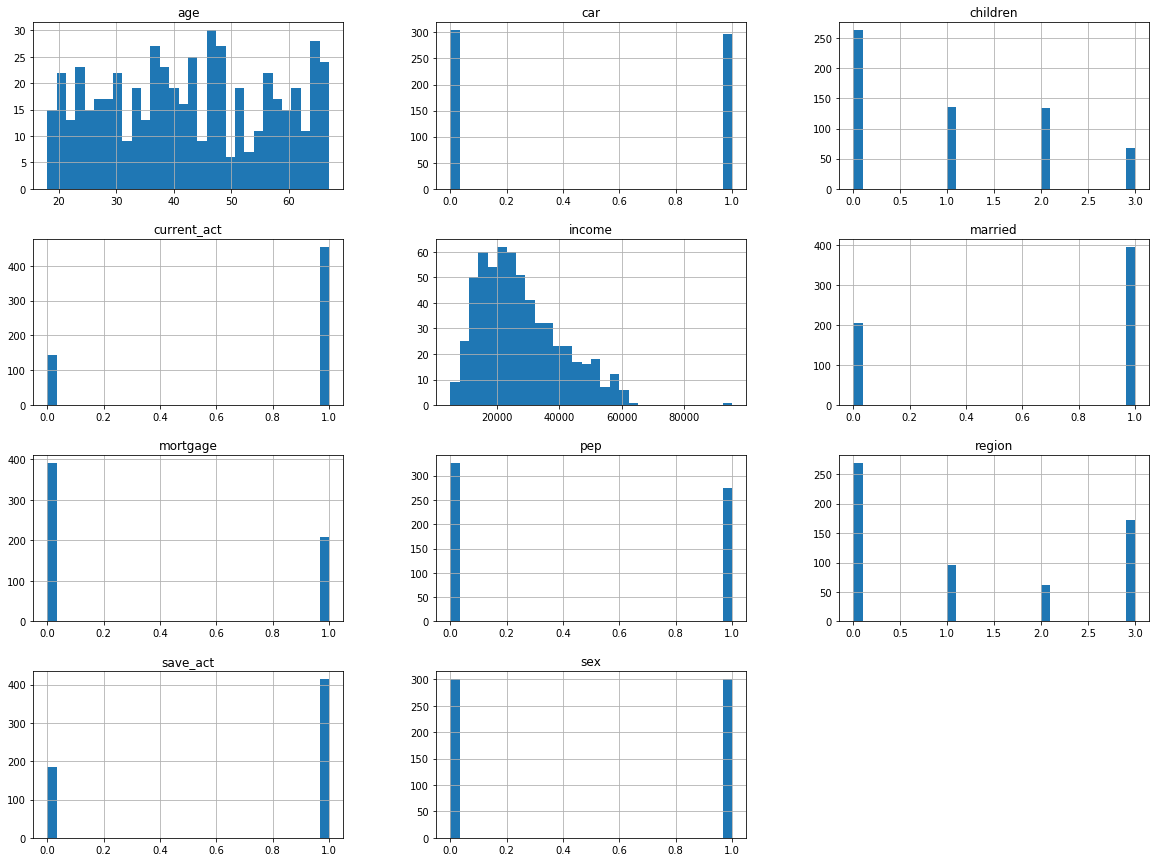

In [7]:
# 모든 수치형 속성에 대한 히스토그램 한꺼번에 그리기
# 숫치형은 age와 income. 나머지는 범주형
# bins = 30 은 x축을 30개로 쪼개라
df.hist(bins=30, figsize=(20,15))

D:\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text yticklabel objects>)

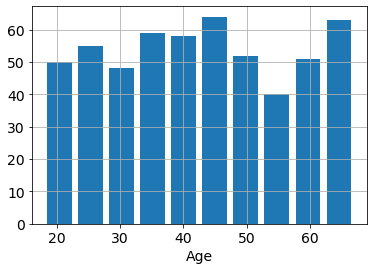

In [8]:
# plt.hist(df.age, rwidth=0.8)
# plt.grid()
# plt.xlabel('Age', fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

In [9]:
print(new.shape)
new.tail()

(200, 11)


,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage
195,ID12896,66,1,0,58792.6,0,1,1,1,1,1
196,ID12897,19,1,0,17906.8,0,2,1,1,0,0
197,ID12898,54,1,1,29348.8,0,0,0,0,1,1
198,ID12899,42,0,3,20552.5,1,0,1,1,1,0
199,ID12900,34,1,0,25843.1,0,2,0,1,1,0


#### Explore Data Look for Correlations ####

<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png" alt="correlation">

In [10]:
# 속성 간 피어슨 상관계수 출력하기
# 전체 수치형 데이터를 콜러에이션으로 보여 줌
# 상관관계 예측변수를 줄여줌
# pep와 다른 독립 변수가 얼마나 연관이 있나 살펴보자.
df.corr()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
age,1.000000,-0.127984,0.025891,0.743619,0.017157,0.023944,0.068454,0.171417,-0.035449,-0.030696,0.193604
sex,-0.127984,1.000000,-0.035018,-0.030606,0.021110,-0.014206,0.006667,0.007207,-0.019466,0.066465,0.046843
region,0.025891,-0.035018,1.000000,0.009813,0.006188,0.011520,0.021860,0.084382,-0.013356,0.026083,-0.027279
income,0.743619,-0.030606,0.009813,1.000000,-0.002977,0.042774,0.072590,0.265233,0.035036,-0.019666,0.225086
married,0.017157,0.021110,0.006188,-0.002977,1.000000,-0.048716,-0.009571,0.028604,-0.059996,-0.021711,-0.189578
children,0.023944,-0.014206,0.011520,0.042774,-0.048716,1.000000,0.036455,0.041536,0.006238,-0.074339,-0.057663
car,0.068454,0.006667,0.021860,0.072590,-0.009571,0.036455,1.000000,0.034310,-0.034783,-0.007743,0.018917
save_act,0.171417,0.007207,0.084382,0.265233,0.028604,0.041536,0.034310,1.000000,0.042511,-0.001588,-0.072779
current_act,-0.035449,-0.019466,-0.013356,0.035036,-0.059996,0.006238,-0.034783,0.042511,1.000000,-0.036704,0.025141
mortgage,-0.030696,0.066465,0.026083,-0.019666,-0.021711,-0.074339,-0.007743,-0.001588,-0.036704,1.000000,-0.024182


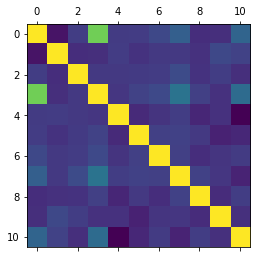

In [11]:
# 속성간 상관계수를 한눈에 파악하기 위해 그림으로 도식하기
plt.matshow(df.corr())

In [12]:
# 클래스 변수인 pep와 각 속성간의 피어슨 상관계수를 내림차순으로 출력하기
# pep 데이터 sorting
df.corr().pep.sort_values(ascending=False)

pep            1.000000
income         0.225086
age            0.193604
sex            0.046843
current_act    0.025141
car            0.018917
mortgage      -0.024182
region        -0.027279
children      -0.057663
save_act      -0.072779
married       -0.189578
Name: pep, dtype: float64

#### Explore Data - Detect Outliers

<img align="left" src="http://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png" alt="Boxplot Outlier">

age       AxesSubplot(0.125,0.536818;0.775x0.343182)
income       AxesSubplot(0.125,0.125;0.775x0.343182)
dtype: object

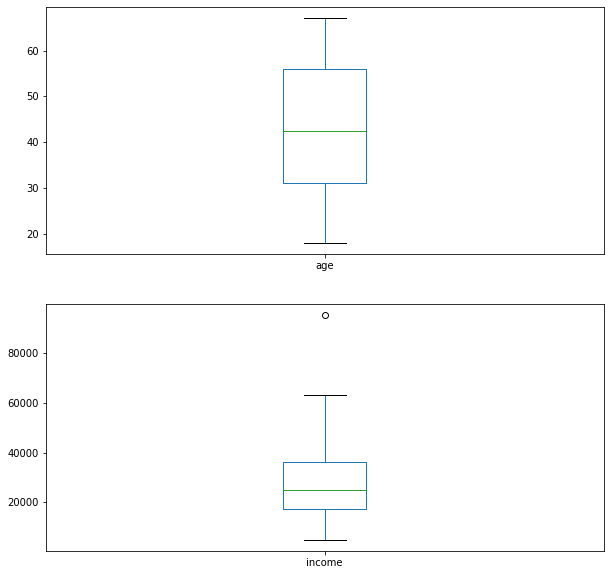

In [13]:
# 나이와 수입 속성에 이상치가 있는지 Boxplot을 그려서 알아본다.
# 이상치 발굴은 boxplot에서 박스 밖에 있는 점을 이상치(Outlier)로 본다.
df.loc[:, ['age', 'income']].plot.box(subplots=True, \
                                      layout=(2,1), figsize=(10,10))

## Step 3: Data Preparation

#### Replace Missing Values

In [48]:
# Save original data 
# => 학습 데이터를 조작하다가 문제가 생겨 처음으로 되돌아 가려면 이 셀부터 다시 시작하세요 !!!
# 데이터 원본 유지를 이해 copy를 사용

mdf = df.copy()

In [49]:
# 나이의 평균값과 나이별 발생빈도 계산하기
# 채워넣을 땐 평균 또는 최빈값(가장 많이 나오는 값)을 쓴다

display(mdf.age.mean())
display(mdf.age.median())
display(mdf.age.value_counts().head())

42.662962962962965

42.5

40.0    19
64.0    18
58.0    17
27.0    17
43.0    17
Name: age, dtype: int64

In [50]:
# # NA값이 있는 행 없애기
# mdf.dropan(axis=0, inplace=True)
# mdf

In [51]:
# 평균값으로 결측값 대체하기
# fillna 는 널값을 채우라. 여기서는 평균으로 채우고 있음.
# 분석의 상황에 따라 null 값을 그대로 사용함.

mdf.age.fillna(round(df.age.mean(),0), inplace=True)
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
id             600 non-null object
age            600 non-null float64
sex            600 non-null int64
region         600 non-null int64
income         600 non-null float64
married        600 non-null int64
children       600 non-null int64
car            600 non-null int64
save_act       600 non-null int64
current_act    600 non-null int64
mortgage       600 non-null int64
pep            600 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F5AFE8D08>,
      dtype=object)

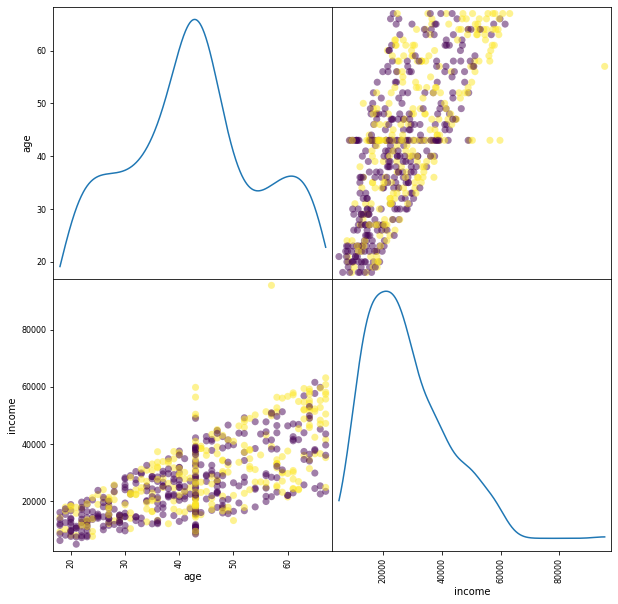

In [52]:
from pandas.plotting import scatter_matrix
scatter_matrix(mdf.iloc[:, [1,4]], c=df['pep'], \
               figsize=(10,10), marker='o', s=50, diagonal='kde')

#### Construct Data Derive Attributes

In [53]:
# # 명목소득 보다 명목소득을 자녀수로 나눈 실질소득이 개인연금 가입에 더 유효한 속성이라고 가정하고 이를 구현
# # 자식에 따라 realincome 변수를 추가
# mdf['realincome'] = np.where(mdf['children']==0,\
#                              mdf['income'], mdf['income']/mdf['children'])
# mdf.head() # realincome이라는 항목이 생김

#### Select Data Filter Attributes

In [54]:
# # 파생변수인 실질소득을 유도하는데 사용된 명목소득과 자녀수를 제거
# # pep와 상관관계가 거의 없는 current_act, car, mortgage, region 속성 제거
# # 아래 컬럼은 없애고 분석하겠다.

# columns = ['income', 'children', 'current_act', 'car', 'mortgage', 'region']
# mdf = mdf.drop(columns, axis=1)
# mdf.head()

#### Split Data

In [55]:
from sklearn.model_selection import train_test_split # for Hold-out validation

In [56]:
dfX = mdf.drop(['id', 'pep'], axis=1) # exclude 'id' attribute & class variable
dfy = mdf['pep']
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, \
                                                    test_size=0.25, random_state=0)

In [57]:
print(X_train.shape, X_test.shape)

(450, 10) (150, 10)


In [58]:
X_train.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage
46,50.0,0,0,13283.9,0,1,1,1,1,0
263,60.0,0,0,46358.4,1,0,1,1,1,1
458,18.0,1,2,13700.2,0,1,0,1,1,0
230,59.0,0,0,30189.4,1,0,1,0,1,1
107,23.0,1,0,13039.9,1,0,0,0,1,0


## Step 4: Modeling

<font color = "darkgreen">
##### 1. Decision Trees #####
</font>
<img align="left" src="https://cdn-images-1.medium.com/max/870/1*xzF10JmR3K0rnZ8jtIHI_g.png" width=700 height=500 alt="Decision Tree">

In [59]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [60]:
pred_tree = tree.predict(X_test);pred_tree

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<font color = "darkgreen">
##### 2. SVM (Support Vector Machine) #####
<img align="left" src="https://78.media.tumblr.com/0e459c9df3dc85c301ae41db5e058cb8/tumblr_inline_n9xq5hiRsC1rmpjcz.jpg"
width=500 height=500 alt="SVM">

In [61]:
from sklearn.svm import SVC 
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

<font color = "darkgreen">
##### 3. Neural Networks (Multi-layer Perceptron) #####
</font>  
<img align="left" src="https://3.bp.blogspot.com/-vYvrkXroyDY/WdObH7y6rBI/AAAAAAAAAZ0/nqYZCwLD2doT354ZJLI0HBkcY-Pjc8LqACLcBGAs/s1600/neural_nets_thumbnail.png" width=400 height=300 alt="NN">
<img align="left" src="https://cdn-images-1.medium.com/max/479/1*QVIyc5HnGDWTNX3m-nIm9w.png" width=600 height=400 alt="NN">

In [62]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

<font color = "darkgreen">
##### 4. Logistic Regression #####

In [63]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<font color = "darkgreen">
##### 5. Random Forest #####

In [64]:
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier()
r_forest.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Assess Model

<img align="left" src='https://user-images.githubusercontent.com/52098725/70013538-5d80a100-15bb-11ea-9dbd-445eb817fa11.png' alt="confusion matrix">

In [65]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(혼동행렬)
|
|

SyntaxError: invalid syntax (<ipython-input-65-e1a91873c1a0>, line 3)

In [66]:

confusion_matrix(y_test, pred_tree)

NameError: name 'confusion_matrix' is not defined

In [67]:
#### from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree, target_names = ['not buy', 'buy']))

NameError: name 'classification_report' is not defined

<font color = "darkgreen">
##### 1. Decision Trees #####

In [68]:
display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.9355555555555556

0.8733333333333333

<font color = "darkgreen">
##### 2. SVM #####

In [69]:
display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

1.0

0.5266666666666666

<font color = "darkgreen">
##### 3. Neural Networks #####

In [70]:
display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.4488888888888889

0.48

<font color = "darkgreen">
##### 4. Logistic Regression #####

In [71]:
display(logit.score(X_train, y_train))
display(logit.score(X_test, y_test))

0.6444444444444445

0.6133333333333333

<font color = "darkgreen">
##### 5. RandomForest #####

In [72]:
display(r_forest.score(X_train, y_train))
display(r_forest.score(X_test, y_test))

0.9822222222222222

0.78

## Step5 : Evaluation

#### Which model is the best ? <br> Is the model useful ?

In [73]:
best_model = tree # Change this code if the best model is not decision tree.
best_model.score(X_test, y_test)

0.8733333333333333

In [74]:
from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)

0    78
1    72
Name: pep, dtype: int64


0.52

## Step6 : Deployment

#### Preprocessing

In [75]:
# You must do the same preprocessing as the modeling data.
ndf = new.copy()
ndf['realincome'] = np.where(ndf['children']==0, \
                             ndf['income'], ndf['income']/ndf['children'])
ndf = ndf.drop(['income', 'children'], axis=1)
ndf.head()

,id,age,sex,region,married,car,save_act,current_act,mortgage,realincome
0,ID12701,23,1,0,1,1,1,0,1,18766.90
1,ID12702,30,1,1,0,0,1,0,1,9915.67
2,ID12703,45,0,1,0,1,1,1,0,21881.60
3,ID12704,50,1,3,1,0,1,0,1,23397.20
4,ID12705,41,0,0,1,1,1,1,0,20721.10


#### Case I Apply the best model to select target customers

In [76]:
ndf['pred'] = best_model.predict(ndf.loc[:, 'age':'realincome'])

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 9 

In [77]:
print(best_model.predict_proba(ndf.loc[:, 'age':'realincome']))
ndf['pred_prob'] = best_model.predict_proba(ndf.loc[:, 'age':'realincome'])[:,1]

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 9 

In [43]:
ndf.head()

,id,age,sex,region,married,car,save_act,current_act,mortgage,realincome
0,ID12701,23,1,0,1,1,1,0,1,18766.90
1,ID12702,30,1,1,0,0,1,0,1,9915.67
2,ID12703,45,0,1,0,1,1,1,0,21881.60
3,ID12704,50,1,3,1,0,1,0,1,23397.20
4,ID12705,41,0,0,1,1,1,1,0,20721.10


In [44]:
target = ndf.query('pred == 1 & pred_prob > 0.7') # PEP에 가입할 확률이 70%가 넘는 고객만 추출
target.sort_values(by="pred_prob", ascending=False).to_csv("pep_target_AN.csv", index=False)
pd.read_csv("pep_target_AN.csv").tail()

UndefinedVariableError: name 'pred' is not defined

#### Case II Export the best model for future use in other programs or systems

In [45]:
from sklearn.externals import joblib

D:\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
# save the model to disk
joblib.dump(best_model, 'pep_model.sav')

['pep_model.sav']

In [47]:
# load the model from disk
loaded_model = joblib.load('pep_model.sav')
loaded_model.score(X_test, y_test)

0.66